<a href="https://colab.research.google.com/github/mayankraj25/PyTorch/blob/main/Pyorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
dataset=MNIST(root='data/',download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.09MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.64MB/s]


In [4]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [5]:
test_dataset=MNIST(root='data/',train=False)
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Label :  5


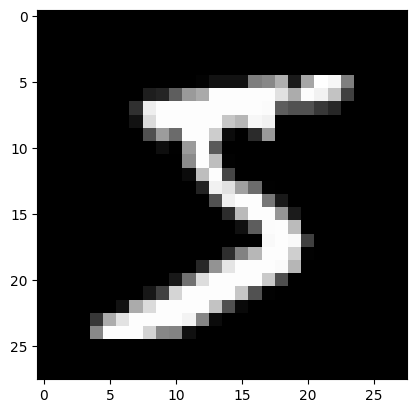

In [7]:
import matplotlib.pyplot as plt
image,label=dataset[0]
plt.imshow(image,cmap='grey')
print("Label : ",label)

Label :  0


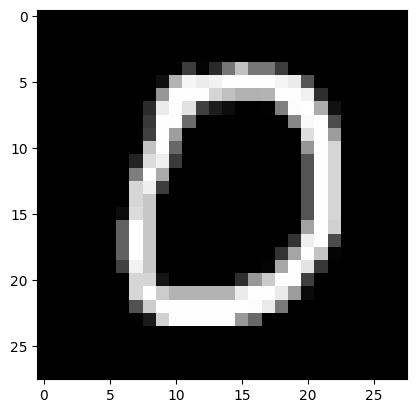

In [8]:
image,label=test_dataset[10]
plt.imshow(image,cmap='grey')
print("Label : ",label)

In [9]:
from torchvision.transforms import transforms

In [10]:
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())
img_tensor,label=dataset[0]
print(img_tensor.shape,label)
#The fisrt value in the tensor shows the number of colour channels in the image which is 1 here because it is a greyscale image.

torch.Size([1, 28, 28]) 5


In [11]:
print(img_tensor)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [12]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


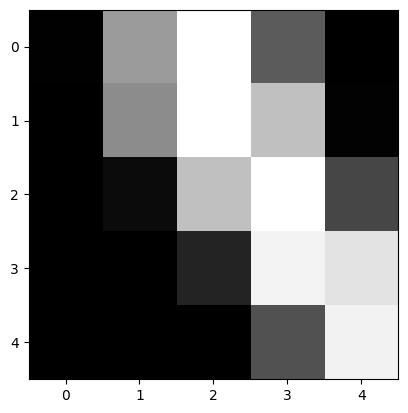

In [13]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='grey')

In [14]:
from torch.utils.data import random_split
train_ds,vs_ds=random_split(dataset,[50000,10000])
print(len(train_ds),len(vs_ds))

50000 10000


In [15]:
from torch.utils.data import DataLoader
batch_size=128
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(vs_ds,batch_size)

## Model

Now that we have prepared our data loaders, we can define our model.

- A **logistic regression** model is almost identical to a linear regression model, i.e., there are weights and bias matrices, and the output is obtained using simple matrix operations:  
pred = x @ w.t() + b
- Just as we did with linear regression, we can use `nn.Linear` to create the model instead of defining and initializing the matrices manually.
- Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor needs to be flattened out into a vector of size `784` (`28 * 28`) before being passed into the model.
- The output for each image is a vector of size `10`, with each element of the vector signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [16]:
import torch.nn as nn
inputSize=28*28
num_classes=10

#Logistic regression model
model=nn.Linear(inputSize,num_classes)

In [17]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [19]:
for images,labels in train_loader:
    print(labels)
    print(images.shape)
    outputs=model(images)
    break

tensor([2, 2, 1, 7, 2, 6, 3, 3, 7, 5, 6, 0, 2, 0, 6, 4, 9, 8, 9, 8, 6, 8, 4, 5,
        3, 2, 9, 2, 0, 5, 5, 1, 3, 9, 3, 6, 2, 3, 7, 7, 9, 5, 3, 8, 0, 9, 2, 4,
        4, 4, 4, 0, 8, 2, 3, 2, 4, 7, 3, 6, 3, 6, 9, 8, 0, 4, 5, 1, 1, 3, 9, 0,
        1, 1, 3, 1, 3, 1, 6, 5, 6, 3, 5, 6, 7, 9, 7, 3, 5, 0, 2, 3, 8, 8, 0, 8,
        8, 1, 1, 6, 8, 8, 0, 0, 0, 4, 2, 0, 4, 5, 6, 5, 1, 8, 5, 4, 0, 2, 7, 8,
        9, 9, 0, 2, 0, 3, 1, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

This leads to an error, because our input data does not have the right shape. Our images are of the shape `1×28×28`, but we need them to be vectors of size `784` i.e. we need to flatten them out. We'll use the `.reshape` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector, without really changing the underlying data.

To include this additional functionality within our model, we need to define a custom model, by extending the `nn.Module` class from PyTorch.

In [20]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(inputSize,num_classes)

    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out=self.linear(xb)
        return out

model=MnistModel()

In [21]:
for images,labels in train_loader:
    print("Image shape : ",images.shape)
    outputs=model(images)
    break
print("Output shape : ",outputs.shape)
print("Sample Output : ",outputs[:2].data)

Image shape :  torch.Size([128, 1, 28, 28])
Output shape :  torch.Size([128, 10])
Sample Output :  tensor([[-0.1310, -0.0201, -0.3787, -0.0512,  0.4757, -0.0493,  0.4086, -0.0130,
          0.1589, -0.0515],
        [-0.0130, -0.0145, -0.0305, -0.2593,  0.3191, -0.1526,  0.2717,  0.0077,
          0.1167,  0.0340]])


For each of the 100 input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities. For that to happen, the elements of each output row must lie between 0 and 1 and sum to 1, which is clearly not the case initially.

To convert the output rows into probabilities, we use the **softmax** function, defined as:

$$
S(y_i) = \frac{e^{y_i}}{\sum_{j} e^{y_j}}
$$

Where:

- \( y_i \) is the \( i \)-th logit (raw score) of the output.
- \( e^{y_i} \) makes all elements positive.
- The denominator ensures all outputs sum to 1, turning them into probabilities.

This results in a vector of probabilities for each input, where each element represents the confidence for a particular class.

While it's easy to implement manually, we'll use the implementation provided by **PyTorch**, as it handles multidimensional tensors efficiently.

In [22]:
import torch.nn.functional as F
#Applay softmax for each output row
probs=F.softmax(outputs,dim=1) #outputs[1]
#Look at the sample probabilities
print("Sample Probabilities:\n",probs[:2].data)
#Add up the probabilities of an output row
print("Sum : ",torch.sum(probs[0]).item())

Sample Probabilities:
 tensor([[0.0822, 0.0919, 0.0642, 0.0891, 0.1509, 0.0892, 0.1411, 0.0925, 0.1099,
         0.0890],
        [0.0947, 0.0945, 0.0930, 0.0740, 0.1320, 0.0823, 0.1258, 0.0967, 0.1078,
         0.0992]])
Sum :  0.9999999403953552


In [23]:
max_probs,probs=torch.max(probs,dim=1)
print(max_probs[:10])
print(probs[:10])

tensor([0.1509, 0.1320, 0.1559, 0.1465, 0.1336, 0.1323, 0.1298, 0.1721, 0.1502,
        0.1278], grad_fn=<SliceBackward0>)
tensor([4, 4, 4, 6, 9, 6, 4, 4, 4, 7])


In [24]:
print(labels[:10])

tensor([2, 2, 4, 3, 1, 0, 3, 2, 6, 9])


In [25]:
def accuracy(outputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [26]:
accuracy(outputs,labels)

tensor(0.1641)

In [27]:
loss_fn=F.cross_entropy
loss=loss_fn(outputs,labels)
print(loss)

tensor(2.2993, grad_fn=<NllLossBackward0>)


In [28]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, self, batch):
        images, labels = batch
        out = self(images)  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss

    def validation_step(self, self, batch):
        images, labels = batch
        out = self(images)  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)  # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(
        epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

IndentationError: expected an indented block after function definition on line 31 (ipython-input-28-1853547109.py, line 32)